# Chapter 5: k Nearest Neighbours

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## 5.1 Introduction & Motivation

As last classical classifier, we'll check ot the k-NN (Nearest Neighbors) algorithm. This is based on the very simple and logical idea that observations of the same class must resemble each other. In our digit examples this definitely makes sense, but what does this concetely mean and how can we tell a computer when things resemble each other?

This and much more is what we'll learn in this chapter! Excited yet?

## 5.2 Problem Setting

Once again, no surprises should be found in the following setup:

Image Data Shape (1797, 64)
Label Data Shape (1797,)


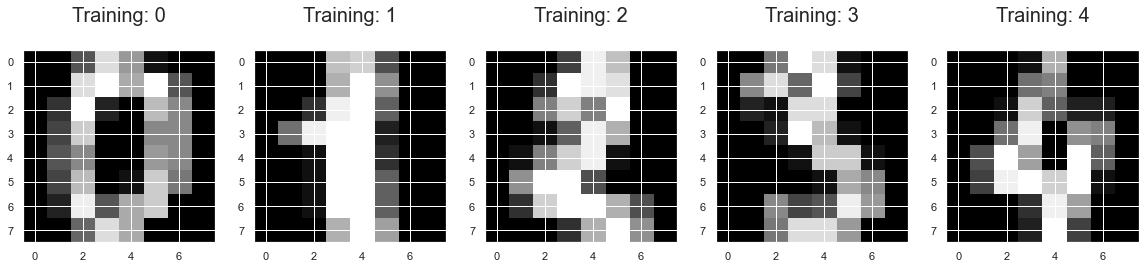

In [50]:
digits = datasets.load_digits()
dir(digits)
# data
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

## 5.3 Model

### 5.3.1 Model

In our digit database the indepent variables are difficult to illustrate, so let's look at a dataset like we did in the previous chapter:

![alt text](https://depiesml.files.wordpress.com/2015/08/knn_plot.png?w=600&h=586)

If we want a model to classify this type of data, we'll make use of one very important property of classes of data: they flock together in the right dimensions. That is, in these two variables (F1 and F2), we can clearly see that all the points of the same class are bunled together. In average, we can say that if we take a random blue point, we'll easier find another blue point nearby rather than say a green or red one.

It is exactly this what kNN does: it takes a point which we want to predict. For example, the grey point:

![alt text](https://depiesml.files.wordpress.com/2015/08/knn-k5-initial1.png?w=600&h=586)

The kNN algorithm then calculates the distance of all points starting from that point, and selects the $k$ nearest datapoints. 

![](https://depiesml.files.wordpress.com/2015/08/knn-k5-neighbor.png)

These points then "vote" on which class we would like to predict. Different voting schemes are possible; but most straightforward will be that: the class which is represented the most will be the prediction.

### 5.3.2 Model Estimation

That all sounds easy enough, but let's put that into practice.
We'll make a 9-Nearest-Neighbours classifier and fit it onto our data:

In [51]:
neigh = KNeighborsClassifier(n_neighbors=9)# 9
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

Next we can either make a prediction for a certain observation, multiple observations, or all observations of our test set:

### Nearest Neighbor

In [59]:
# Returns a NumPy Array
# Predict for One Observation (image)
neigh.predict(x_test[0].reshape(1,-1))
neigh.predict(x_test[0:10])
predictions = neigh.predict(x_test)
score = neigh.score(x_test,y_test)

print(score)

0.9777777777777777


### Tree Prediction

In [65]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train, y_train)
predictionTree = tree.predict(x_test)
score = tree.score(x_test,y_test)

print(score)

0.8577777777777778


### Logistic Regression

In [58]:
logisticRegr = LogisticRegression(multi_class='auto', max_iter=100000)
logisticRegr.fit(x_train, y_train)
predictionL = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)

print(score)

0.9533333333333334


## 5.4 Model Evaluation

### Accuracy

In [44]:
# accuracy
# Use score method to get accuracy of model
score = neigh.score(x_test, y_test)
print(score)

0.9777777777777777


##### Question 1: Tweak the n_neighbors parameter to check which model gives the highest accuracy. From when does tweaking the parameter doesn't change much anymore? Interpret! Explain what is happening in the model, and what the influence is on the accuracy. Is this logical?


##### So the lower you N is the higher your accuracy. This seems logical cause of the amount of neighbors it needs to calculate before it is able to calculate the n. If you have calculate the 1st closed you only need to calculate that one. but if you have 100st nearset you have maybe value from a different class.

### Precision

In [62]:
print("Nearest")
print(classification_report(y_test, predictions))
print("Logistic")
print(classification_report(y_test, predictionL))
print("Tree")
print(classification_report(y_test, predictionTree))

Nearest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      1.00      0.97        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.94      1.00      0.97        48
           8       1.00      0.88      0.93        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Logistic
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
       

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      1.00      0.97        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.94      1.00      0.97        48
           8       1.00      0.88      0.93        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



##### Question 2: Tweak the n_neighbors parameter to check which model gives the highest precision. From when does tweaking the parameter doesn't change much anymore? Interpret! Explain what is happening in the model, and what the influence is on the precision. Is this logical?

##### around 6 The Precision is aroun 0.97. And I keep getting this number till 25. So I would say that it doesn't change much after 11 Somewhere in the middle. I Guess that it just tries to take  the average of a value. 

### Confusion Matrix

You should by now be familiar with the confusion Matrix. 

##### Question 3: Make the confusion matrix and interpret it.

In [63]:
print("Nearest")
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
print("Tree")
cmT = metrics.confusion_matrix(y_test, predictionTree)
print(cmT)
print("Linear")
cmL = metrics.confusion_matrix(y_test, predictionL)
print(cmL)


Nearest
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  1  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  3  0  2  0  0  0  1 42  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
Tree
[[33  0  0  2  1  1  0  0  0  0]
 [ 0 37  2  1  1  0  1  0  1  0]
 [ 1  3 37  0  1  0  0  0  2  0]
 [ 0  2  1 35  0  0  0  1  2  4]
 [ 1  2  0  0 32  0  0  1  0  2]
 [ 1  0  0  3  0 41  0  0  0  3]
 [ 0  1  0  2  0  0 49  0  0  0]
 [ 1  0  1  0  1  1  0 41  0  3]
 [ 0  2  2  4  0  2  0  0 36  2]
 [ 0  1  1  3  1  3  0  0  0 38]]
Linear
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  

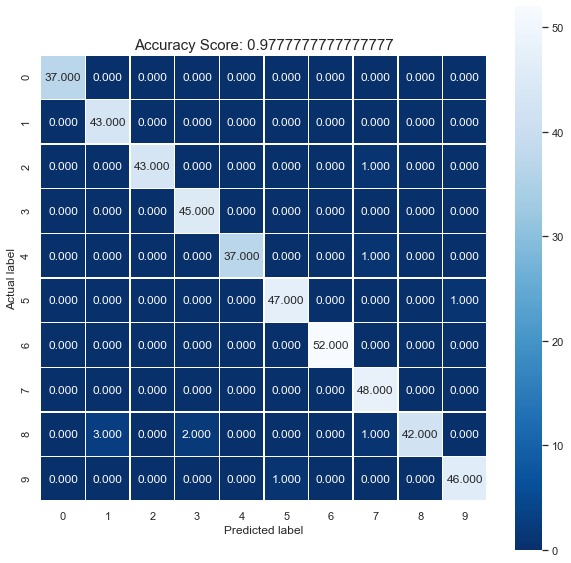

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## 5.5 Exercises

##### Question 1: See section 5.4
##### So the lower you N is the higher your accuracy. This seems logical cause of the amount of neighbers it needs to calculate before it is able to calculate the n. If you have calculate the 1st closed you only need to calculate that one. but if you have 100st nearset you have first find out what the other 99 nearest are
##### Question 2: See section 5.4
##### around 6 The Precision is aroun 0.97. And I keep getting this number till 25. So I would say that it doesn't change much after 11 Somewhere in the middle. I Guess that it just tries to take  the average of a value. 
##### Question 3: See section 5.4
##### Question 4: 
Compare the optimal n_neighbours model to the optimal logistic regression and decision tree. Which model do you prefer based upon the accuracy? Which model do you prefer based upon the precision? Which model overall? Or is there no unambiguous choice to be made?
##### If I compare the 3 models (Tree,Nearest,Logistic) I can see that the average score of Nearest is the highest compared to Tree and Logisitc. Tree is arounf 87 so lower then the other 2. Where Logisitc isn't that far off as nearest neighbor (95 and 97) I would say that based on precision I chose for nearest.
##### Question 5: 
If you had to choose, would you choose a model with higher accuracy of higher precision? Why? Do some online research on the advantages/disadvantages! What does this concretely mean for the digits dataset?
##### I would go for higher Accuracy. we want to be as close to be as the true value. Of course we also want consistentie. But what i consistentie if you are not accurate. Of course you can say it vise versa. You can have 1 accurate value and no Consistentie so both are crucial. So What does this mean for the digits dataset. I rather have Linear ( the score that had 95) Than the nearest neighbor. Because even though nearest neighbor has a higher accuracy we don''t know when our dataset grows and our k nearest neighbor grows as well. If the Dataset is pricise. Maybe other classes have intervene with you result thus boost or hinder your results. So my pick would be the Linear regression.